# Create, Load and Query a Relational Database using MySql

### About this notebook:

- This notebook is intended to aid a user who is familiar with Relational Databases (RDBs), Data Models and Synapse in creating a relational database, uploading data to it, performing SQL joins on that data and uploading the data to Synapse. This will all be done using a series of csv files.

- The program will use a series of csv and config files to _automatically_ generate the RDB and perform the queries.

- There is a query 'playgound' to test out queries before adding them to the actual query list.

- Since everything is being automatically generated, the names _must_ match so please pay attention to all the naming conventions to avoid odd errors (ie. file structure, file names, attribute display names vs labels etc..)

#### Additional Notes/Assumptions:

- This notebook is specific to the NF Tools Registry, please contact the Fair Data Workstream at Sage Bionetworks, if you are planning to use this for another project.

- This also assumes you have a working Data Model. For information on how to construct a Data Model please consult the Confluence documents for this project.

- Assumes you already have Schematic downloaded as a developer.

### Set up Schematic-RDB Environment
1. `poetry install`
2. Install MySql Server:
    - Download instructions for [Mac OSX.](https://flaviocopes.com/mysql-how-to-install/)
    - Save your Username and Password and add these to the sql_config.yml file. NEVER COMMIT THIS FILE TO GITHUB!


### Set up Config Files

Establishing the RDB requires **3** config files.

1. **Config.yml**
    - This is the standard schematic configuration file and should have been set up when installing schematic.
2. **sql_config.yml**
    - Put this file in the same folder as config.py (if moving them to a new folder)
    - Fill out with your MySql login information.
    - NEVER COMMIT THIS FILE TO GITHUB!

### Download all .csv files and place them in the correct file structure.

The files that are needed to run this program are:

1. **Data Model CSV:**   

    - Download the Data Model from Google Sheets as a csv and stored in a data folder.
        - Alternatively, data model may be available as a versioned Github release.
    
        - The naming should follow this structure:
    
            `datamodelname.rdb.model.csv`
    
        - For NFTI this model name is: 
    
            ` nf_research_tools.rdb.model.csv`
    
    - For context, when Schematic is making the Relational Database, it will know to make a RDB and what to name it based on the name provided here. This is the database name that you will access in your MySql database.
    
        - This is saved so that the JSONLD can be made when there are changes to the `.csv` but if your model is stable you can skip this step.
        - We will convert this `.csv` model into a JSONLD format (used by schematic) at a later step.
        
2. **Data Model JSONLD**

    - If you already have a `JSONLD` version of the data model (perhaps from a github repo) add it to the same folder you created for the `.csv`
    
    - JSONLD naming convention follows the same as the `.csv` but the suffix is `.jsonld`.
    
    - If you do not have the `JSONLD` run the following command:
    
        `schematic schema convert /Path/to/datamodelname.rdb.model.csv`
        
        -`datamodelname.rdb.model.jsonld` will be saved to the same folder as the `.csv`
        
3. **Manifests**

    - Manifests are used to load data into the database.
    - If you do not already have manifests you can make them for each table.
        - Make sure your `config.yml` -- `model->input->location` -- points to the `datamodelname.rdb.model.jsonld`
        - Fill out the manifest section of the `config.yml` file to point create manifests for each `data_type`.
        
   - Fill out all manifests and download them locally.
   - For NF the file names have the following example structure:
       `XX_nfti_YYYY.rdb.manifest.csv`
       - `XX` is an abbreviation for the group of manifests this manifest belongs to. For example, would be CL for the `Cell Line` group of manifests.
       - `nfti` name of the database but could be anything to identify the dataset.
       - `YYYY` is the name of the table the manifest fills out for the given manifest group (for example 'Resource')
   
   - Save files within the follwing file structure
       - `rdb_data`:
           - `XX`:
               - `XX_nfti_Resource.rdb.manifest.csv`
               - `XX_nfti_Development.rdb.manifest.csv` ... etc...
   - Place combined manifests into a folder called `ALL`

4. **Column Types**
    - `column_types.csv` is used to specifying a Synapse Table schema when uploading data to synapse.
        - See [Synapse Documentation](https://docs.synapse.org/rest/org/sagebionetworks/repo/model/table/ColumnType.html) for details on column types available.
    - Download `NF_column_types.csv` from Google or fill out blank example `scripts/notebook_examples/column_types.csv`.
    - Filling out `column_types.csv`:
        - `column_name`: 
            - For each attrubute you want to assign a type, find the label name in the JSONLD (usually just the Display name as camelCase). Use that name as the `column_name` then fill out the rest of the columns depending on the column type you are specifying. 
        - Enter `column_type` in all UPPERCASE. 
    - Place in same folder as the manifests (see below).
    
5. **Joins For Synapse**
    - `joins_for_synapse.csv` is a file that allows users to specify the joins they would like to run on the tables in their database and either upload to synapse or save locally.
    - Download `NF_joins_for_synapse.csv` from google or fill out blank example `scripts/notebook_examples/joins_for_synapse.csv`
    - Notes:
    
        - **Table Name:**
            - String. The name of table you want to save the join as. Do not repeat table names within a Synapse project.
        - **MySql Query:**
            - String. Query in MySql Syntax
        - **Table ID / NF table ID:**
            - String. Synapse Table ID for the final project table. If this is your first time creating the join, you will not have this value yet. It will be generated once the join is performed for the first time. Enter the Synapse ID once it is available.
        - **Staging table ID:**
            - String. I use a Staging Project folder to test out joins before putting them into the actual project folder. This is the table ID that is present in the staging project folder.
        - **Define Column Schema:**
            - True: Set to true if you want to define the column schema when uploading the table to Synapse, must upload `column_types.csv` with all columns in the table that you want to define added to that spreadsheet.
            - False: Use default column types when uploading to Synapse. This may cause some things to not be loaded properly (Lists, intergers etc) but is straightforward.
        
   
        
        
    

    

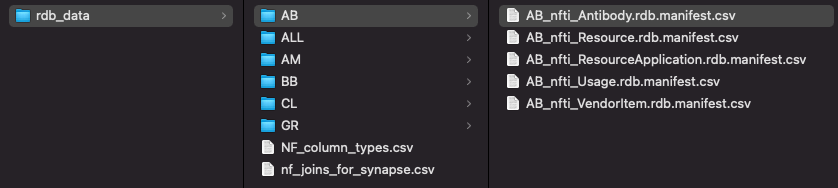

## Modules:

Fill out args section with all path, filename and query info.

1. **Create, Load or Visualize your database**
    - You only need to create your database once. If you have a new datamodel and want to update it, first `drop` your old database (see "Helpful Notes" at the bottom of this notebook for details on how to directly intreact with the database) then create_db_tables again using the new model.
    - You only need to update your database when you change one or more of your manifest files.
    1. `create_db_tables`: Create your database (uses the data model)
    2. `update_db_tables`: Add data to your database (uses the manifests)
        - Can use the same commands as above to inspect your database.
    3. `create_schema_viz`: PNG showing the database structure as a visual (stored in output folder specified).
2. **Query Database and Upload to Synapse**
    - This section assumes you have validated working queries that are in the `Joins_for_Synapse.csv` file.
    - Choose the query you want to run when setting up the args.
3. **MySqy Query Playground**
    - Use this section to test out new queries before adding them to `Joins_for_Synapse.csv`
        - Login to your database (do not modify this section)
        - Write a query.
        - Create a dataframe using your query.
4. **Helpful Notes**
    - Notes on how to interact with your database via the commandline
   

In [ ]:
# Imports
import argparse

import os
from pathlib import Path

from schematic.db.rdb import RDB
from schematic.db.sql import SQL
from schematic.utils.io_utils import load_json
from schematic.utils.sql_utils import sql_helpers

from create_load_sql_db_nf import sql_create_load
from sql_query_nf import sql_query, parse_variables

### Enter all variable information

In [2]:
args = {
    # path info:
    'path_to_configs': 'path/to/configs', # Path to folder containing config files
    'data_dir': 'path/to/data_model', # Path to folder where rdb.model.jsonld
    'rdb_data_dir': 'path/to/rdb_data', #Path to folder that contains manifests and csvs (organized above)
    'output_path': 'output/path',  # Path to folder to store all outputs 
    
    # filenames
    'rdb_jsonld_filename': 'nf_research_tools_test.rdb.model.jsonld',
    'query_csv':'nf_joins_for_synapse.csv',
    'column_types_csv':'NF_column_types.csv',

    # synapse arguments:
    'save_to_synapse': False,
    'save_local': True,
    'table_id_type': 'Staging table ID', # 'Staging table ID' or 'NF table ID'
    'synapse_project_folder': '', # Enter appropriate SynID

    # sql query:
    'name_of_query': '', # Name of the query you want to run from Joins for Synapes
}

## Creating, Loading or Visualizing your database.

In [7]:
# Choose which function(s) to run
create_db_tables = False
update_db_tables = False
create_schema_viz = True

In [11]:
if create_db_tables:
    sql_create_load(args['data_dir'], args['rdb_jsonld_filename'], args['path_to_configs']).create_db_tables()

if update_db_tables:
    sql_create_load(args['data_dir'], args['rdb_jsonld_filename'], args['path_to_configs']).update_db_tables(args['rdb_data_dir'])

if create_schema_viz:
    output_path = sql_create_load(args['data_dir'], args['rdb_jsonld_filename'], args['path_to_configs']).create_schema_viz(args['output_path'], args['rdb_jsonld_filename'])

  var = yaml.load(f)



2022-03-02 16:18:09,408 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-02 16:18:09,409 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,412 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-02 16:18:09,414 INFO sqlalchemy.engine.Engine [generated in 0.00137s] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [generated in 0.00137s] ()


2022-03-02 16:18:09,418 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-02 16:18:09,419 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,421 INFO sqlalchemy.engine.Engine SHOW FULL TABLES FROM `nf_research_tools_test`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW FULL TABLES FROM `nf_research_tools_test`


2022-03-02 16:18:09,423 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,427 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `AnimalModel`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `AnimalModel`


2022-03-02 16:18:09,428 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,436 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,437 INFO sqlalchemy.engine.Engine [generated in 0.00133s] ('nf_research_tools_test', 'donor', 'donorId', 'nf_research_tools_test', 'donor', 'donorId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [generated in 0.00133s] ('nf_research_tools_test', 'donor', 'donorId', 'nf_research_tools_test', 'donor', 'donorId')


2022-03-02 16:18:09,451 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Donor`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Donor`


2022-03-02 16:18:09,452 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,458 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


2022-03-02 16:18:09,459 INFO sqlalchemy.engine.Engine [cached since 0.02349s ago] ('nf_research_tools_test', 'donor', 'donorId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.02349s ago] ('nf_research_tools_test', 'donor', 'donorId')


2022-03-02 16:18:09,464 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Antibody`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Antibody`


2022-03-02 16:18:09,465 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,469 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Biobank`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Biobank`


2022-03-02 16:18:09,471 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,475 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


2022-03-02 16:18:09,476 INFO sqlalchemy.engine.Engine [cached since 0.04102s ago] ('nf_research_tools_test', 'resource', 'resourceId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.04102s ago] ('nf_research_tools_test', 'resource', 'resourceId')


2022-03-02 16:18:09,479 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Resource`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Resource`


2022-03-02 16:18:09,481 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,489 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s), (%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s), (%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,490 INFO sqlalchemy.engine.Engine [cached since 0.05459s ago] ('nf_research_tools_test', 'geneticreagent', 'geneticReagentId', 'nf_research_tools_test', 'antibody', 'antibodyId', 'nf_research_tools_test', 'cellline', 'cellLineId', 'nf_research_tools_test', 'animalmodel', 'animalModelId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.05459s ago] ('nf_research_tools_test', 'geneticreagent', 'geneticReagentId', 'nf_research_tools_test', 'antibody', 'antibodyId', 'nf_research_tools_test', 'cellline', 'cellLineId', 'nf_research_tools_test', 'animalmodel', 'animalModelId')


2022-03-02 16:18:09,502 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `GeneticReagent`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `GeneticReagent`


2022-03-02 16:18:09,503 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,506 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `CellLine`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `CellLine`


2022-03-02 16:18:09,507 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,512 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


2022-03-02 16:18:09,514 INFO sqlalchemy.engine.Engine [cached since 0.0781s ago] ('nf_research_tools_test', 'donor', 'donorId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.0781s ago] ('nf_research_tools_test', 'donor', 'donorId')


2022-03-02 16:18:09,517 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Development`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Development`


2022-03-02 16:18:09,519 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,526 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s), (%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s), (%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,527 INFO sqlalchemy.engine.Engine [cached since 0.09137s ago] ('nf_research_tools_test', 'resource', 'resourceId', 'nf_research_tools_test', 'investigator', 'investigatorId', 'nf_research_tools_test', 'publication', 'publicationId', 'nf_research_tools_test', 'funder', 'funderId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.09137s ago] ('nf_research_tools_test', 'resource', 'resourceId', 'nf_research_tools_test', 'investigator', 'investigatorId', 'nf_research_tools_test', 'publication', 'publicationId', 'nf_research_tools_test', 'funder', 'funderId')


2022-03-02 16:18:09,538 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Investigator`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Investigator`


2022-03-02 16:18:09,539 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,543 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Publication`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Publication`


2022-03-02 16:18:09,544 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,550 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Funder`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Funder`


2022-03-02 16:18:09,552 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,555 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Mutation`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Mutation`


2022-03-02 16:18:09,556 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,561 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,562 INFO sqlalchemy.engine.Engine [cached since 0.127s ago] ('nf_research_tools_test', 'mutationdetails', 'mutationDetailsId', 'nf_research_tools_test', 'animalmodel', 'animalModelId', 'nf_research_tools_test', 'cellline', 'cellLineId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.127s ago] ('nf_research_tools_test', 'mutationdetails', 'mutationDetailsId', 'nf_research_tools_test', 'animalmodel', 'animalModelId', 'nf_research_tools_test', 'cellline', 'cellLineId')


2022-03-02 16:18:09,573 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `MutationDetails`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `MutationDetails`


2022-03-02 16:18:09,574 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,580 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Observation`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Observation`


2022-03-02 16:18:09,581 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,586 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,587 INFO sqlalchemy.engine.Engine [cached since 0.1512s ago] ('nf_research_tools_test', 'resource', 'resourceId', 'nf_research_tools_test', 'investigator', 'investigatorId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.1512s ago] ('nf_research_tools_test', 'resource', 'resourceId', 'nf_research_tools_test', 'investigator', 'investigatorId')


2022-03-02 16:18:09,598 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `ResourceApplication`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `ResourceApplication`


2022-03-02 16:18:09,599 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,604 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s));
                


2022-03-02 16:18:09,605 INFO sqlalchemy.engine.Engine [cached since 0.1697s ago] ('nf_research_tools_test', 'resource', 'resourceId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.1697s ago] ('nf_research_tools_test', 'resource', 'resourceId')


2022-03-02 16:18:09,608 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Usage`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Usage`


2022-03-02 16:18:09,609 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,615 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,616 INFO sqlalchemy.engine.Engine [cached since 0.1805s ago] ('nf_research_tools_test', 'publication', 'publicationId', 'nf_research_tools_test', 'resource', 'resourceId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.1805s ago] ('nf_research_tools_test', 'publication', 'publicationId', 'nf_research_tools_test', 'resource', 'resourceId')


2022-03-02 16:18:09,628 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `Vendor`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `Vendor`


2022-03-02 16:18:09,630 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,632 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `VendorItem`


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - SHOW CREATE TABLE `VendorItem`


2022-03-02 16:18:09,633 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 16:18:09,637 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%s, %s, %s), (%s, %s, %s));
                


2022-03-02 16:18:09,638 INFO sqlalchemy.engine.Engine [cached since 0.2029s ago] ('nf_research_tools_test', 'resource', 'resourceId', 'nf_research_tools_test', 'vendor', 'vendorId')


INFO: [2022-03-02 16:18:09] sqlalchemy.engine.Engine - [cached since 0.2029s ago] ('nf_research_tools_test', 'resource', 'resourceId', 'nf_research_tools_test', 'vendor', 'vendorId')


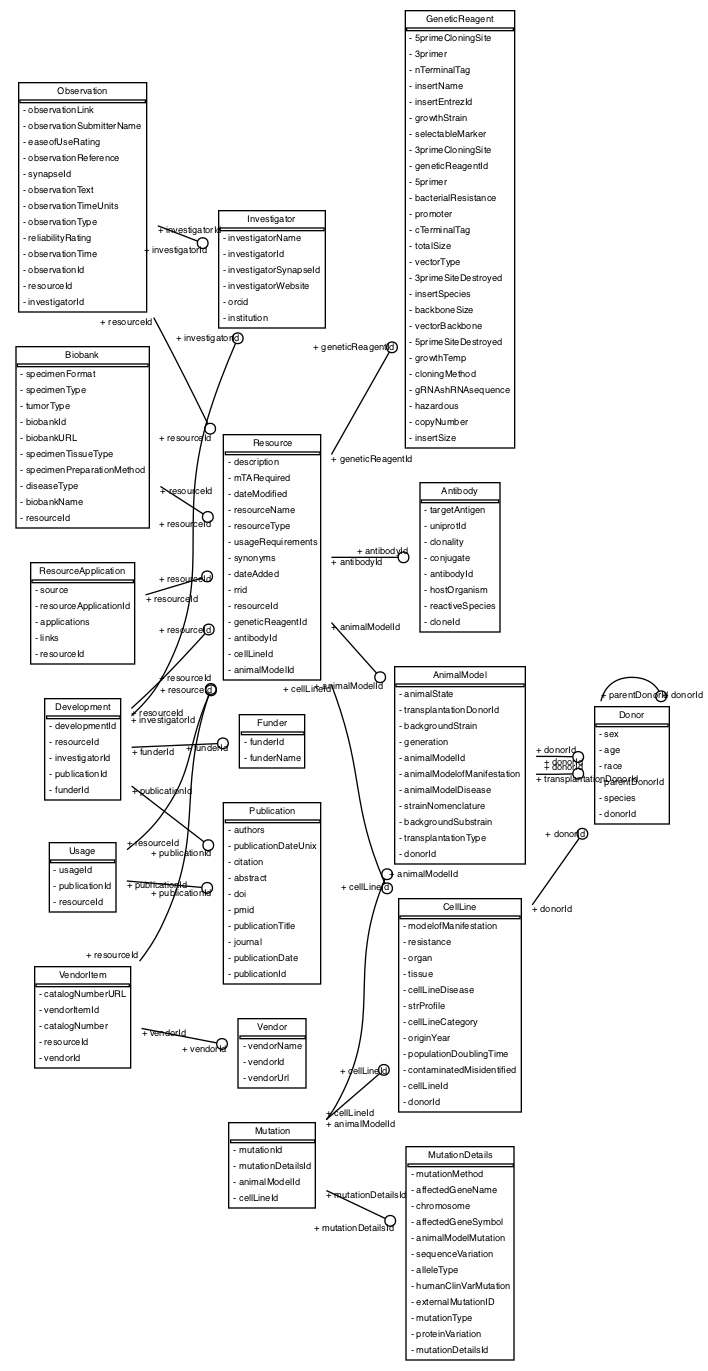

In [18]:
# Run this if you made an the viz 
Image(output_path)

## Query and Load your Database


In [6]:
# Load and parse aruguments
arguments = parse_variables(args).set_arguments()

# Run your chosen query. Depending on if saving local or on synapse, check for output accordingly.
sql_query(arguments['data_dir'],
          arguments['rdb_jsonld_filename'],
          arguments['path_to_configs']).run_sql_queries(arguments)

2022-03-02 15:31:58,956 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-02 15:31:58,957 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 15:31:58,959 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-02 15:31:58,960 INFO sqlalchemy.engine.Engine [generated in 0.00099s] ()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - [generated in 0.00099s] ()


2022-03-02 15:31:58,963 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-02 15:31:58,964 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - [raw sql] ()

UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.5.1) is available. Your version (2.4.0) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.5.1 release notes

https://python-docs.synapse.org/build/html/news.html



### MySql Query Playground

If you want to try out some new queries use this area below:

In [19]:
# Connect to your MySql database. Do not change this area, just run it :)
path_to_json_ld = sql_helpers.get_data_path(args['data_dir'], args['rdb_jsonld_filename'])

rdb_model = RDB(
    path_to_json_ld=path_to_json_ld,
    requires_component_relationship = "requiresComponent"
)

json_data_model = load_json(path_to_json_ld)

var = sql_helpers.parse_config(args['path_to_configs'], 'sql_config.yml')
connection = str("mysql://{0}:{1}@{2}/".format(var['username'],
    var['password'], var['host'])) + rdb_model.schema_name

sql_model = SQL(rdb_model, connection)

2022-03-02 15:38:35,864 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-02 15:38:35,865 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 15:38:35,868 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-02 15:38:35,869 INFO sqlalchemy.engine.Engine [generated in 0.00128s] ()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - [generated in 0.00128s] ()


2022-03-02 15:38:35,873 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-02 15:38:35,875 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - [raw sql] ()


In [ ]:
query = 'SELECT * FROM `Biobank`'

In [18]:
df = sql_model.run_sql_query(sql_model, [query])
df

,specimenFormat,specimenType,tumorType,biobankId,biobankURL,specimenTissueType,specimenPreparationMethod,diseaseType,biobankName,resourceId
0,"RNA,whole tumor,DNA",human tissue,"malignant peripheral nerve sheath tumor,schwan...",674650f1-dcd7-4342-8c1a-d17b141b4954,https://dhartspore.org/request-biospecimens.html,"tumor,blood,bone,cerebrospinal fluid,brain","Cryopreserved, RNA later, Formalin-fixed, Ethanol",Neurofibromatosis type 1,CTF Biobank,e4e60a43-9073-4dfa-a629-76b472451b7f
1,"whole tumor,DNA,whole cell lysate,RNA","cell lines,human tissue,xenograft tumors","malignant peripheral nerve sheath tumor,plexif...",d6f86049-4dc0-4543-bf99-0311eb44cb6e,https://www.hopkinsmedicine.org/kimmel_cancer_...,"tumor,blood","Flash frozen, FFPE",Neurofibromatosis type 1,The Johns Hopkins NF1 Biospecimen Repository,17ad02e9-22c2-429e-8f1f-361adba1e0d7


### Helpful Notes:

**Accessing your MySql database from the commandline**

- From the commandline enter: 
    - `mysql -u root -p` 
- Enter your username and password that you used when installing MySql.
- Choose your database. For example:
    - `use nf_research_tools;`
- Look at the tables:
    - `show tables;`
- Look at a specific table:
    - `describe AnimalModel;`
- Can write queries:
    - `SELECT * from AnimalModel;`
- If you need to to remake your database for any reason (for example you updated your data model):
    - `drop nf_research_tools;`
    
[Here](http://g2pc1.bu.edu/~qzpeng/manual/MySQL%20Commands.htm) is a helpful cheatsheet of commandline arguments for interacting with your MySql database.